Analisis mensual en forma de word cloud

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


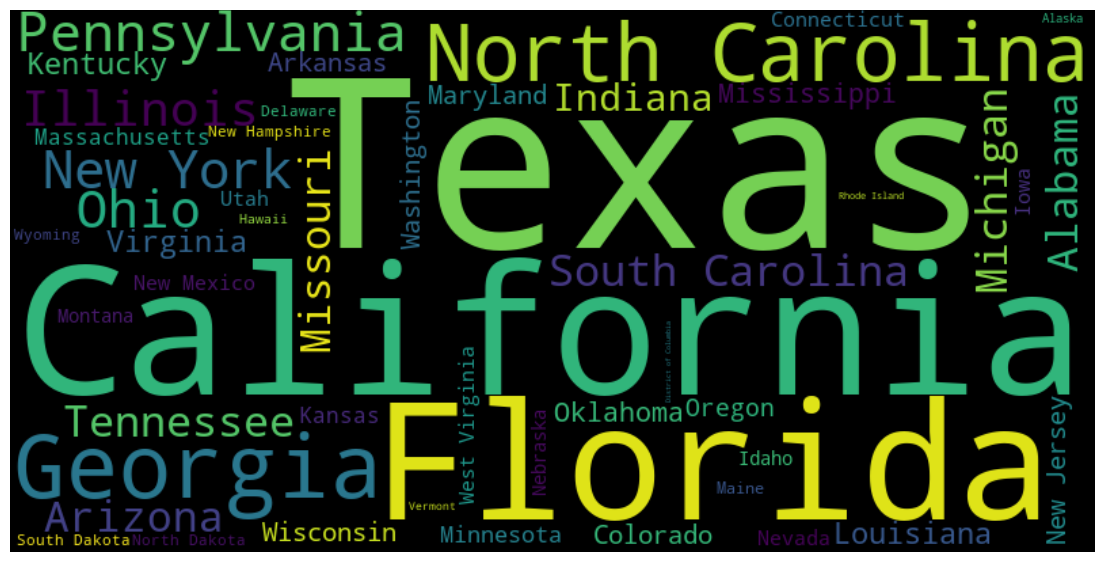

In [2]:
from wordcloud import WordCloud
from google.cloud import bigquery
client = bigquery.Client(project='poto-382221')
query = """
SELECT 
    state_name,
    EXTRACT(MONTH FROM timestamp_of_crash) AS month,
    COUNT(*) AS num_accidents
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name, month
"""

# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un dataframe de Pandas
results_df = results.to_dataframe()

# Crear una lista con todas las palabras y su frecuencia
words = results_df.groupby('state_name')['num_accidents'].sum().to_dict()

# Crear la Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(words)

# Mostrar la Wordcloud
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()